# Geostrophic Method

Example of geostrophic velocity calculation from CTD profiles collect during the SAM03 cruise of the "South Atlantic Meridional Overturning Circulation" (SAMOC) project.

## Background: Thermal wind 
Geostrophy is the simplest balance of forces in the ocean and atmosphere. It holds for flows on time scales longer than a a couple of days and largish length scales, and consists of a balance between the Coriolis and pressure forces in the horizontal momentum equation and the hydrostratic balance in the vertical momentum equation:

\begin{align}
-f v &= -\frac{1}{\rho_0}\frac{\partial p}{\partial x}\,, \qquad\qquad       \quad(1)\\
+f u &= -\frac{1}{\rho_0}\frac{\partial p}{\partial y}\,, \qquad\qquad       \quad(2)\\
0 &= -\frac{1}{\rho_0}\frac{\partial p}{\partial z} - \frac{\rho}{\rho_0} g\,,    \quad\qquad (3)
\end{align}

where $(u,v)$ is the horizontal velocity, f is the Coriolis parameter, $p$ is the pressure and the total density is $\rho_{tot} = \rho_0 + \rho(x,y,z,t)$. Using (3) to eliminate the pressure in (1) and (2) yields the thermal wind equations:

\begin{align}
-f \frac{\partial v}{\partial z} &= -\frac{g}{\rho_0}\frac{\partial \rho}{\partial x}\,, \qquad\qquad (4)\\
+f \frac{\partial u}{\partial z} &= -\frac{g}{\rho_0}\frac{\partial \rho}{\partial y}\,. \qquad\qquad (5)\\
\end{align}

This equation **relates the vertical shear of geostrophic currents ($\partial_z u$, $\partial_z v$) to horizontal gradients of density ($\partial_x \rho$, $\partial_y \rho$).** The name thermal wind relates to the meteorological origin of these equations. A zeroth-order approximation for the density anomalies is $\rho \approx \alpha T$, where $T$ are potential temperature anomalies and $\alpha$ is the thermal coefficient of expansion. Thus the geostrophic winds are related to gradients in temperature––they are thermal winds. In general, however, density is related to temperature and salinity through the equation of state, $\rho = \rho(S,T,p)$, which for seawater is a complicated empirical polynomial.

The thermal wind equations (4) and (5) allows one to calculate the geostrophic velocity (**a vector**) from profiles of temperature and salinity (**scalars**) collected with CTDs. Temperature and salinity are much easier to measure than velocity, so the geostrophic method was for a long time the go-to method to estimating horizontal velocities of mesoscale and large-scale flows in the ocean. This is done by integrating the thermal wind equations vertically. For example, $\int (4)\,, dz$, starting a reference depth $z_0$, yields:

\begin{equation}
-f(v - v_0) = - -g \frac{\partial \hbar}{\partial x}\,, \qquad\quad    (6)
\end{equation}
where
\begin{equation}
\hbar(z;z_0) \equiv \int_{z_0}^{z}\!\!\! \rho \,\,dz'  \qquad\qquad    (7)
\end{equation}
is the **steric height** relative to $z_0$. Note that the geostrophic method yields relative geostrophic velocities   (i.e., a difference between $v$ an $v_0$, the velocity at the reference level $z=z_0$). Ocean currents typically decay significantly into the deep ocean, and historically oceanographers have chosen deep reference levels and assumed that $v_0 = 0$ (a level of "no motion"). Today currents are measured directly, so one uses a measured velocity $v_0$ to obtain the absolute geostrophic currents.

A simple algorithm for calculating geostrophic velocities given two CTD profiles located at $x_a$ and $x_b$ is:

    1.) Calculate the potential density using the seawater equation of state. There exist available software for this calculation. The most used is the Gibbs seawater toolbox (http://www.teos-10.org/software.htm)[http://www.teos-10.org/software.htm], available in a number of programming languages;
    
    2.) Calculate the steric height by numerically integrating the potential density profiles (7);

    3.) Calculate the horizontal gradient of steric height using finite differences:
                        
$$ \frac{\partial \hbar}{\partial x} \approx \frac{\Delta \hbar}{\Delta x} = \frac{\hbar(x=x_b)-\hbar(x=x_a)}{x_b-x_a}$$

    4.) Calculate the geostrophic velocity:
    
$$ v - v_0 = \frac{1}{f}\frac{\Delta\hbar}{\Delta x}$$

This is the most straightforward road to estimating the geostrophic velocity. However, for historical reasons and practical reasons, this calculation done is isobaric coordinates. Most existing software, including the GSW toolbox's functions, use isobaric coordinates and geopotential anomaly (a quantity closely related to steric height). While the isobaric coordinates are a bit more involved, the results are equivalent to the steric height calculation for most oceanographic applications.

Below I show an example of geostrophic velocity estimation using GSW, a go-to toolbox of most physical oceanographers. We load CTD from the SAM03 SAMOC cruise, calculate the potential density, and compute the geostrophic velocity. The code below is written in Python, GSW is available in other languages, and in principle, these calculations could be reproduced in Matlab and R.

If you are interested in running this code on your computer, please reach out with questions.

# Load python modules

In [1]:
# basic python modules
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# utility functions for dealing with Seabird CTD data 
from Utils import *

# nice colomaps for oceanography
import cmocean

# Gibbs seawater toolbox
import gsw

/Users/crocha/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Get SAM03 SAMOC CTD section
This uses the Get_CTD_Section function, which is abstracted away in Utils.py, to load the .cnv data, concatenate the profiles and put them into an xarray DataArray for easy manipulation.

In [2]:
datapath = '../Data/'
stations = ['4','5','6','7','8','9'] 

ctdsection = Get_CTD_Section(datapath,stations)

ctdsection

<xarray.Dataset>
Dimensions:      (cast: 6, pressure: 4844)
Coordinates:
  * pressure     (pressure) float64 1.0 2.0 3.0 ... 4.843e+03 4.844e+03
  * cast         (cast) int64 0 1 2 3 4 5
    latitude     (cast) float64 -34.5 -34.5 -34.51 -34.5 -34.48 -34.52
    longitude    (cast) float64 -51.5 -50.5 -49.48 -48.49 -47.49 -44.43
    station      (cast) <U1 '4' '5' '6' '7' '8' '9'
    distance     (cast) float64 0.0 91.35 185.2 275.1 366.9 647.5
Data variables:
    temperature  (pressure, cast) float64 15.56 19.52 18.96 ... nan nan 0.2382
    salinity     (pressure, cast) float64 29.56 29.92 36.2 ... nan nan 34.67

In [3]:
# Save to netcdf for later use
# ctdsection.to_netcdf('../Data/SAM03_CTD_section.nc')

# Potential density

In [4]:
# Calculate potential density and put it into the DataArray
da = xr.apply_ufunc(gsw.density.sigma0, ctdsection['salinity'],ctdsection['temperature'], 
                    output_dtypes=[ctdsection['salinity'].dtype])

sigma0 = da.compute()
sigma0.name = r'sigma0'
sigma0.attrs["units"] = r"$kg/m^3$"

ctdsection = xr.merge([ctdsection,sigma0])

# T-S diagram

In [5]:
ctdsection['salinity'].size, ctdsection['sigma0'].values.size

(29064, 29064)

(32.5, 36.5)

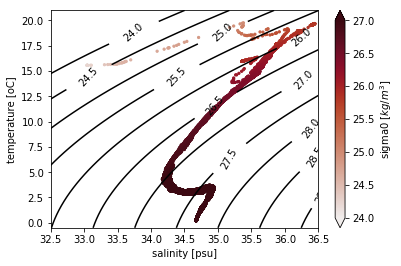

In [6]:
# scatter plot of all TS data

kwargs = {'s' : 5, 'cmap' : cmocean.cm.amp, 'vmin' : 24, 'vmax' : 27}
psc = ctdsection.plot.scatter('salinity','temperature','sigma0',**kwargs)

# plot lines of constant density
s, t = np.linspace(32,37), np.linspace(-0.5,21)
S, T = np.meshgrid(s,t)
SIG0 = gsw.density.sigma0(S,T)
csig0 = np.arange(24,30,0.5)
cs = plt.contour(S,T,SIG0,levels=csig0,colors='k')
plt.clabel(cs, csig0,fmt='%1.1f')

plt.xlim(32.5,36.5)

# Hydrographic section

In [7]:
def plot_stations(ax,zmin,station_type='ctd'):
    if station_type == 'ctd': 
        ax.plot(ctdsection['distance'].values,[0]*len(ctdsection['distance'].values),
             'kv',markersize=13)
    plt.ylim(zmin,0)
    plt.xlim(-15,ctdsection['distance'].values.max()+15)
        
# full depth
def plot_hydrographic_sections(zmin=4500):
    fig = plt.figure(figsize=(17,5))

    ax = fig.add_subplot(131)
    kwargs = {'levels' : np.linspace(0,20,10),'cmap': cmocean.cm.amp}
    ctdsection['temperature'].plot.contourf('distance','pressure',**kwargs)
    plot_stations(ax,zmin)

    fig.subplots_adjust(wspace=0.6)

    ax = fig.add_subplot(132)
    kwargs = {'levels' : np.linspace(34,36.5,10)}
    ctdsection['salinity'].plot.contourf('distance','pressure',**kwargs)
    plt.ylim(zmin,0)
    plot_stations(ax,zmin)

    ax = fig.add_subplot(133)
    kwargs = {'levels' : np.linspace(24,27.5,10),'cmap': cmocean.cm.dense}
    ctdsection['sigma0'].plot.contourf('distance','pressure',**kwargs)
    plt.ylim(zmin,0)
    plot_stations(ax,zmin)

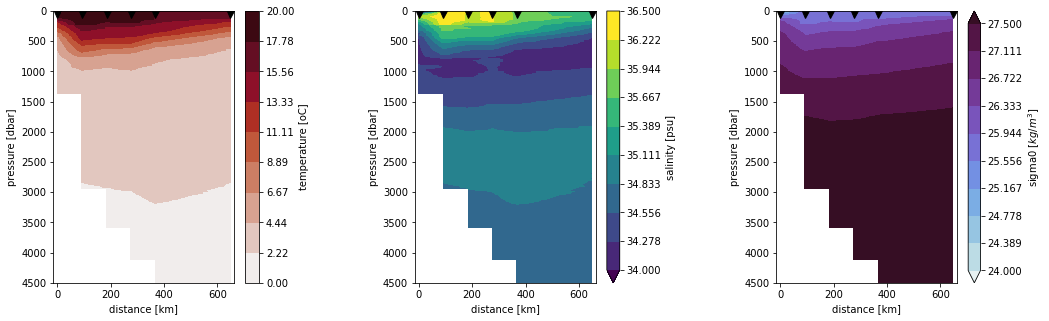

In [8]:
# full water column
plot_hydrographic_sections(zmin=4500)
plt.savefig('../Figures/hydrography_section.png',
            dpi=400,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0)

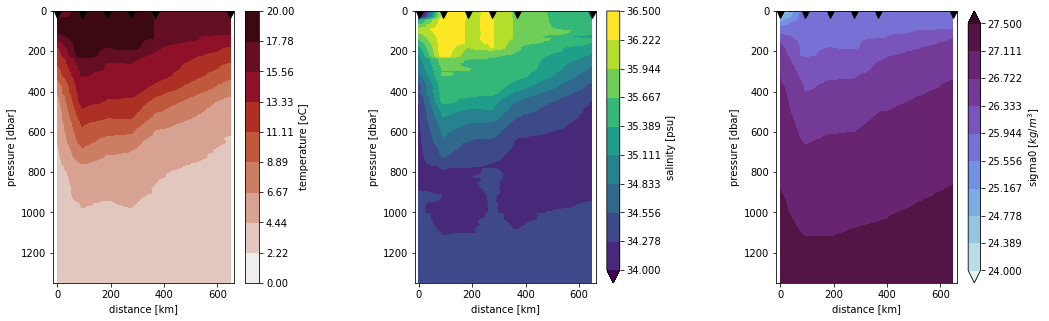

In [9]:
# upper 1350 m
plot_hydrographic_sections(zmin=1350)
plt.savefig('../Figures/hydrography_section_upper1400m.png',
            dpi=400,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0)

# Calculate geostrophic velocity relative to 1350 dbar

In [10]:
# First calculate the geopotential anomaly
dh = gsw.geo_strf_dyn_height(ctdsection['salinity'].values,ctdsection['temperature'].values, 
                    ctdsection['pressure'].values,p_ref=1350)

# Obs: the new version of gsw supports xarray DataArrays, but this is not working well with gsw.geostrohic_velocity(), 
#     thus I'm doing this lazily call of gsw methods with numpy arrays (.values).

In [11]:
# Then calculate the geostrophic velocity
vgeo,longitude_v,latitude_v = gsw.geostrophic_velocity(dh,ctdsection['longitude'].values, 
                                                       ctdsection['latitude'].values)

In [12]:
# The Position (in distance from shallowest station) of velocity estimate
# is mid-way between CTD stations
dist0 = 0.5*(ctdsection['distance'].values[:2].sum())
distance_v = np.cumsum(np.hstack([dist0,gsw.distance(longitude_v,latitude_v)/1e3]))

# Density and velocity sections

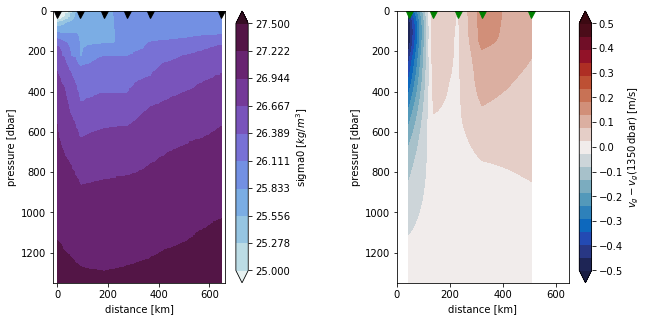

In [13]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
kwargs = {'levels' : np.linspace(25.,27.5,10), 'cmap': cmocean.cm.dense}
ctdsection['sigma0'].plot.contourf('distance','pressure',**kwargs)
plot_stations(ax,zmin=1350)

fig.subplots_adjust(wspace=0.6)

ax = fig.add_subplot(122)

kwargs = {'levels': np.linspace(-.5,.5,20), 'extend' :'both', 
          'cmap': cmocean.cm.balance}

plt.contourf(distance_v,ctdsection['pressure'].values,vgeo,**kwargs)
plt.ylim(1350,0)
plt.xlim(0,ctdsection['distance'].max())
plt.ylabel('pressure [dbar]')
plt.xlabel('distance [km]')
cb = plt.colorbar(ticks=np.arange(-5,.6,.1),label=r'$v_g-v_g(1350\,$dbar) [m/s]')

ax.plot(distance_v,[0]*len(distance_v),'gv',markersize=13)

# Dynamic height
Plot the dynamic height at the surface relative to 1350m. This is a very good approximation for the sea-surface height––note that the sea level changes by 30cm across the current.

Text(0, 0.5, 'Dynamic height [m]')

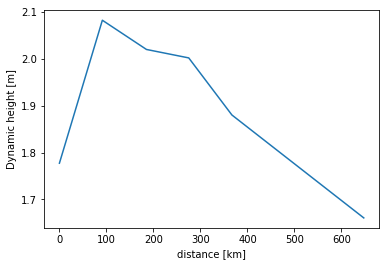

In [14]:
plt.plot(ctdsection['distance'].values,dh[0]/9.81)
plt.xlabel('distance [km]')
plt.ylabel('Dynamic height [m]')